In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Big Query Library
from google.cloud import bigquery
client = bigquery.Client()

In [5]:
# Number of Unique products for which reviews are available
sql = """
select count(distinct asin) prodCount
from `reviewdata.review_electronics`
"""
reviewedproductCount = client.query(sql).to_dataframe().prodCount[0]
reviewedproductCount

475976

In [6]:
# Number of Unique products for which reviews are available
sql = """
select count(distinct asin) prodCount
from `metadata.meta_Electronics`
"""
overallproductCount = client.query(sql).to_dataframe().prodCount[0]
overallproductCount

498196

In [7]:
#Products without Reviews
overallproductCount - reviewedproductCount

22220

In [8]:
# Distribution of Ratings in Electronics category
sql = """
select overall, count(overall) rating
from `reviewdata.review_electronics`
group by overall
order by overall
"""
ratingDistribution = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d479fd30>,
 <a list of 5 Text xticklabel objects>)

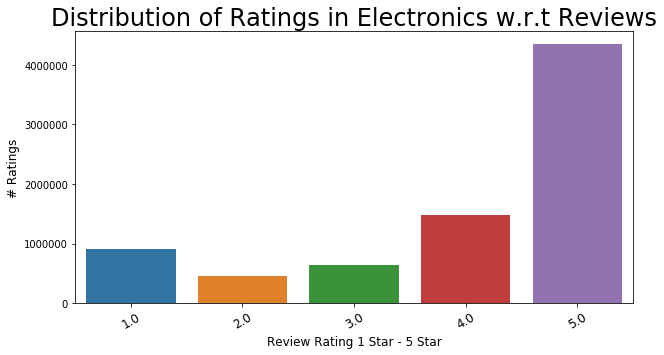

In [9]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Ratings in Electronics w.r.t Reviews",fontsize=24)
sns.barplot(x = ratingDistribution.overall, y = ratingDistribution.rating)
plt.xlabel('Review Rating 1 Star - 5 Star', fontsize=12)
plt.ylabel('# Ratings', fontsize=12)
index = np.arange(len(ratingDistribution.overall))
plt.xticks(index, round(ratingDistribution.overall,2), fontsize=12, rotation=30)

In [10]:
#Percentage of Rating Distribution
ratingDistribution["% Distribution"] = (ratingDistribution.rating/ratingDistribution.rating.sum())*100
ratingDistribution

,overall,rating,% Distribution
0,1.0,901649,11.525225
1,2.0,456256,5.832040
2,3.0,632978,8.090969
3,4.0,1485499,18.988221
4,5.0,4346884,55.563546


In [11]:
#Distribution of Reviews year on year in Electronics Category
sql = """
select reviewYear, count(reviewYear) Reviews
from `reviewdata.review_electronics`
group by reviewYear
order by reviewYear
"""
reviewDistribution = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d4d33390>,
 <a list of 15 Text xticklabel objects>)

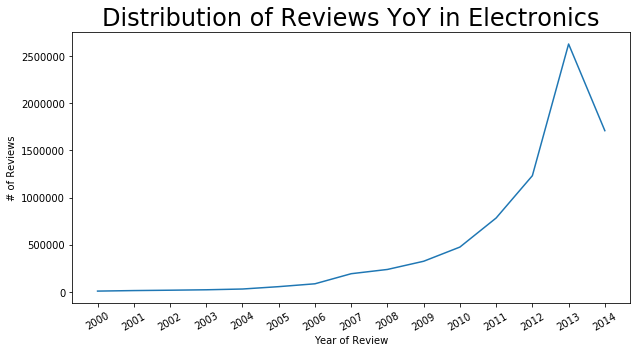

In [14]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Reviews YoY in Electronics",fontsize=24)
sns.lineplot(data = reviewDistribution.Reviews)
plt.xlabel('Year of Review', fontsize=10)
plt.ylabel('# of Reviews', fontsize=10)
index = np.arange(len(reviewDistribution.reviewYear))
plt.xticks(index, reviewDistribution.reviewYear, fontsize=10, rotation=30)

In [18]:
#No of Products Reviewed every Year in Electronics Category
sql = """
select reviewYear Year, count(distinct asin) NoofProducts
from `reviewdata.review_electronics`
group by reviewYear
order by reviewYear
"""
yearlyProductDistribution = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1eaddaee6d8>,
 <a list of 15 Text xticklabel objects>)

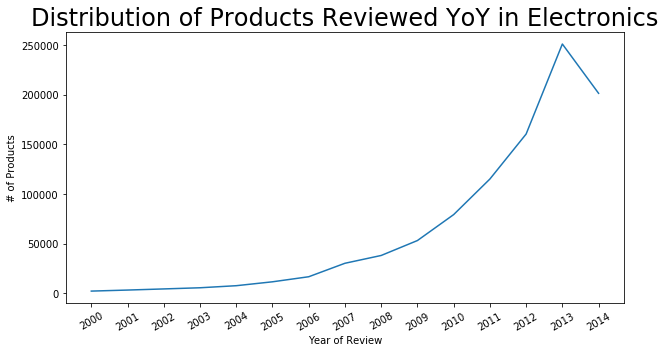

In [20]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Products Reviewed YoY in Electronics",fontsize=24)
sns.lineplot(data = yearlyProductDistribution.NoofProducts)
plt.xlabel('Year of Review', fontsize=10)
plt.ylabel('# of Products', fontsize=10)
index = np.arange(len(yearlyProductDistribution.Year))
plt.xticks(index, yearlyProductDistribution.Year, fontsize=10, rotation=30)

In [15]:
#No of Products Reviewed since 2011 in Electronics Category
sql = """
select count(distinct asin) NoofProducts
from `reviewdata.review_electronics`
where reviewYear > 2010
"""
NoofProductsReviewed = client.query(sql).to_dataframe().NoofProducts[0]
NoofProductsReviewed

414945

In [16]:
#Distribution of Products with Number of Reviews in Electronics category since 2010
sql = """
SELECT COUNT(distinct asin) NoofProducts, bucket 
FROM (
    SELECT asin,CASE WHEN COUNT(reviewText) >=  0 AND COUNT(reviewText) < 20 THEN 1
                        WHEN COUNT(reviewText) >= 20 AND COUNT(reviewText) < 50 THEN 2
                        WHEN COUNT(reviewText) >= 50 AND COUNT(reviewText) < 100 THEN 3
                        WHEN COUNT(reviewText) >= 100 AND COUNT(reviewText) < 300 THEN 4
                        WHEN COUNT(reviewText) >= 300 AND COUNT(reviewText) < 500 THEN 5
                        WHEN COUNT(reviewText) >= 500 THEN 6
                        ELSE 7 END as bucket
    FROM `reviewdata.review_electronics`
    WHERE reviewYear > 2010
    GROUP BY asin) 
GROUP BY bucket
ORDER BY bucket
"""
productReviewsDistribution = client.query(sql).to_dataframe()

In [17]:
productReviewsDistribution['%Distrbution'] = (productReviewsDistribution.NoofProducts/productReviewsDistribution.NoofProducts.sum())*100 
productReviewsDistribution

,NoofProducts,bucket,%Distrbution
0,369540,1,89.057586
1,24820,2,5.981516
2,10166,3,2.449963
3,7379,4,1.778308
4,1511,5,0.364145
5,1529,6,0.368483


([<matplotlib.axis.XTick at 0x1b8d4da4908>,
 <a list of 6 Text xticklabel objects>)

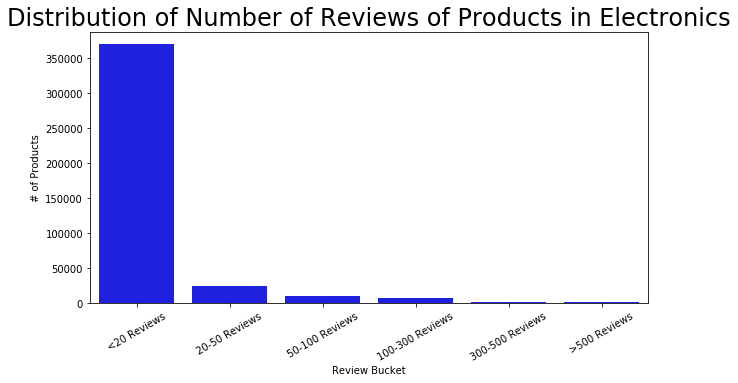

In [18]:
labels = ['<20 Reviews','20-50 Reviews','50-100 Reviews', '100-300 Reviews', '300-500 Reviews', '>500 Reviews']

plt.figure(figsize=(10,5))
plt.title("Distribution of Number of Reviews of Products in Electronics",fontsize=24)
sns.barplot(x = productReviewsDistribution.bucket, y = productReviewsDistribution.NoofProducts,color='blue')
plt.xlabel('Review Bucket', fontsize=10)
plt.ylabel('# of Products', fontsize=10)
index = np.arange(len(productReviewsDistribution.bucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [24]:
#Distribution of Products having more than 100 reviews with Average Rating in Electronics category
sql = """
SELECT COUNT(distinct asin) NoofProducts, bucket 
FROM (
    SELECT asin, CASE WHEN AVG(Overall) >=  1 AND AVG(Overall) < 2 THEN 1
                        WHEN AVG(Overall) >= 2 AND AVG(Overall) < 4 THEN 2
                        WHEN AVG(Overall) >= 4 AND AVG(Overall) < 6 THEN 3
                        END as bucket
    FROM `reviewdata.review_electronics`
    WHERE reviewYear > 2010
    GROUP BY asin
    HAVING COUNT(reviewText) > 300
) 
GROUP BY bucket
ORDER BY bucket
"""
productRatingsDistribution = client.query(sql).to_dataframe()

In [26]:
productRatingsDistribution

,NoofProducts,bucket
0,3,1
1,1052,2
2,1967,3


([<matplotlib.axis.XTick at 0x1b8d4f96da0>,
 <a list of 3 Text xticklabel objects>)

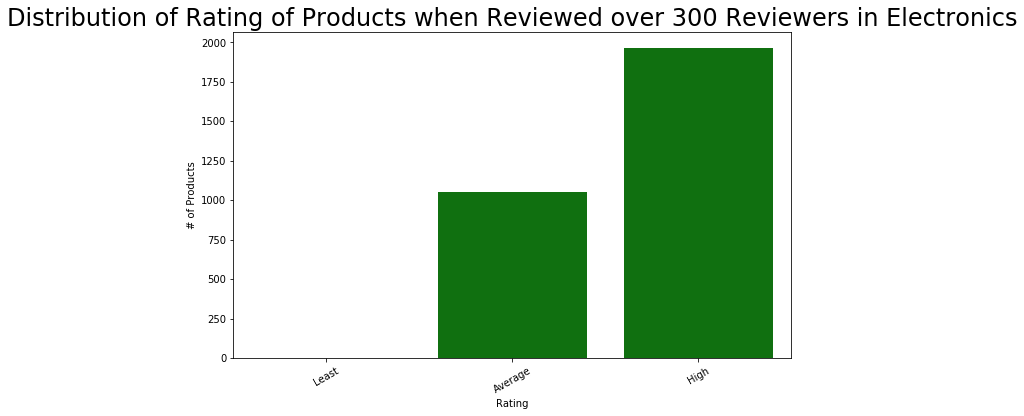

In [25]:
labels = ['Least','Average','High']
colors = ['red','blue','green']

plt.figure(figsize=(10,6))
plt.title("Distribution of Rating of Products when Reviewed over 300 Reviewers in Electronics",fontsize=24)
sns.barplot(x = productRatingsDistribution.bucket, y = productRatingsDistribution.NoofProducts,color='green')
plt.xlabel('Rating', fontsize=10)
plt.ylabel('# of Products', fontsize=10)
index = np.arange(len(productRatingsDistribution.bucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [22]:
#No of Top Reviewed Products in Electronics since 2011
sql = """
SELECT
  ReviewYear,
  COUNT(distinct ProductID) NoofProducts
FROM (
  SELECT
    reviewYear ReviewYear,
    asin ProductID,
    COUNT(reviewText) AS NumberofReviews,
    ROUND(AVG(overall),2) AvgRating
  FROM
    `reviewdata.review_electronics`
  WHERE
    reviewYear > 2010
  GROUP BY
    1,2
  HAVING COUNT(reviewText) > 100
    )
GROUP BY
    ReviewYear
ORDER BY
  ReviewYear
"""
topReviewedProductsCount = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d50e72e8>,
 <a list of 4 Text xticklabel objects>)

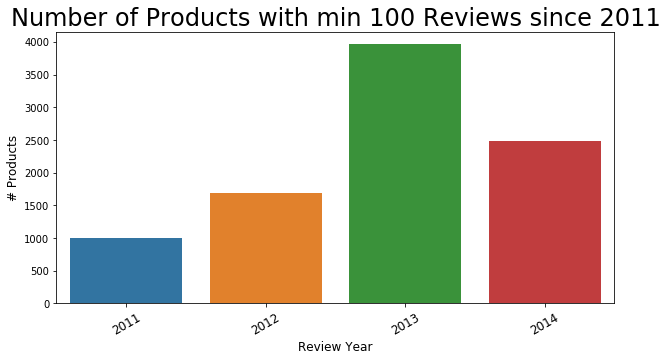

In [23]:
plt.figure(figsize=(10,5))
plt.title("Number of Products with min 100 Reviews since 2011",fontsize=24)
sns.barplot(x = topReviewedProductsCount.ReviewYear, y = topReviewedProductsCount.NoofProducts)
plt.xlabel('Review Year', fontsize=12)
plt.ylabel('# Products', fontsize=12)
index = np.arange(len(topReviewedProductsCount.ReviewYear))
plt.xticks(index, topReviewedProductsCount.ReviewYear, fontsize=12, rotation=30)

In [29]:
#Top 5 Reviewed Products every Year in Electronics since 2011
sql = """
SELECT
  ReviewYear,
  ProductID,
  NumberofReviews,
  AvgRating
FROM (
  SELECT
    reviewYear ReviewYear,
    asin ProductID,
    COUNT(reviewText) AS NumberofReviews,
    ROUND(AVG(overall),2) AvgRating,
    ROW_NUMBER() OVER (PARTITION BY reviewYear  ORDER BY COUNT(reviewText) DESC) AS ProductRank
  FROM
    `reviewdata.review_electronics`
  WHERE
    reviewYear > 2010
  GROUP BY
    1,2
    )
WHERE
  ProductRank <= 5
ORDER BY
  ReviewYear ,
  ProductRank
"""
topReviewedProducts = client.query(sql).to_dataframe()
topReviewedProducts

,ReviewYear,ProductID,NumberofReviews,AvgRating
0,2011,B003DZ165W,2440,4.36
1,2011,B0019EHU8G,2185,4.78
2,2011,B0002L5R78,1933,4.25
3,2011,B003DZ166Q,1817,4.58
4,2011,B00316263Y,1486,4.77
5,2012,B0019EHU8G,4415,4.82
6,2012,B0074BW614,3448,4.70
7,2012,B0044YU60M,2368,4.28
8,2012,B003ELYQGG,2267,4.35
9,2012,B00622AG6S,2242,4.49


In [30]:
#Top 10 5 Rated Products with its reviews
sql = """
select asin ProductID, title ProductName, price Price, count(reviewText) NumberReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
group by asin,title,price
order by AVG(overall) desc,count(reviewText) desc
limit 10
"""
topRatedProducts = client.query(sql).to_dataframe()

#Top 10 5 Rated Products with its reviews
topRatedProducts

,ProductID,ProductName,Price,NumberReviews,AvgRating
0,B008I64AQ8,SquareTrade 3-Year Home AV Protection Plan ($1...,18.03,45,5.0
1,B00GQDCMVA,Microfiber Cleaning Cloth 6-pack Clean Screen ...,9.99,41,5.0
2,B007WMOCW6,Neverending Story eReader Cover,4.51,38,5.0
3,B002T3JN0Y,Kingston Technology ValueRAM 8GB Kit (2x4GB) D...,439.90,36,5.0
4,B00592002W,Samsung Electronics Extreme Low Voltage 30nm U...,41.27,36,5.0
5,B00DWLPUZY,Professional Wireless Home Security Alarm Syst...,199.99,34,5.0
6,B00KC7I2GU,FosPower FUSE World-Wide Universal AC Adapter ...,13.99,31,5.0
7,B00009R8ZW,Print File 120-4B Negative Preservers for 120 ...,6.50,28,5.0
8,B000FIJA6W,MartinLogan DYNBLD Dynamo 10-Inch Subwoofer (S...,129.99,28,5.0
9,B0002VAVII,1GB Upgrade for a Dell Dimension 2400 Series S...,9.92,25,5.0


In [31]:
#Top Reviewed Products in overall Electronics category across Years
sql = """
select asin ProductID, title ProductName, price Price, count(reviewText) NumberofReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
group by asin,title,price
order by count(reviewText) desc,AVG(overall) desc
limit 10
"""
topReviewRatedProducts = client.query(sql).to_dataframe()

# Products with all time highest reviews and corresponding ratings
topReviewRatedProducts

,ProductID,ProductName,Price,NumberofReviews,AvgRating
0,B0074BW614,"Kindle Fire HD 7&quot;, Dolby Audio, Dual-Band...",199.00,18244,4.49
1,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player,34.49,16454,3.93
2,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...,36.79,14172,4.42
3,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...,8.99,12285,4.75
4,B006GWO5WK,None,29.98,12226,4.31
5,B003ELYQGG,"Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,11617,4.39
6,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,11.99,10276,4.70
7,B007R5YDYA,None,178.98,9907,4.69
8,B00622AG6S,PowerGen 2.4Amps / 12W Dual USB Car charger De...,8.99,9823,4.42
9,B0002L5R78,DVI Gear HDMI Cable 2M 6 feet,2.80,9487,4.45


In [33]:
# 20 Least Rated Product with More Reviews in Electronics
sql = """
select asin ProductID, title ProductName, price Price, count(reviewText) NumberofReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
where reviewYear > 2010
group by asin,title,price
having (AVG(overall) BETWEEN 1 AND 2 AND count(reviewText) > 50)
order by  count(reviewText) desc,AVG(overall) desc
limit 20
"""
leastReviewRatedProducts = client.query(sql).to_dataframe()
leastReviewRatedProducts.head(10)

,ProductID,ProductName,Price,NumberofReviews,AvgRating
0,B000Y7T5UU,HDE VGA Adapter to TV S-Video RCA Out Cable fo...,2.87,579,1.99
1,B0030LVHM6,eForCity USB SYNC CABLE CHARGER Compatible Wit...,2.13,438,1.94
2,B005QWH4QA,"eForCity 538581 HDMI to 5 RCA Cable, 5-Feet",5.16,433,1.76
3,B002ZUI68G,HDMI to 3 RCA + VGA Cable M/M 1.8m/6ft,14.56,263,1.57
4,B000FMJLQC,HDMI Splitter (1 to 2) Premium Splitter Cable,6.79,244,1.63
5,B0065S2Y64,"eForCity TOTHHVGA3RC5 HDMI to VGA/3 RCA Cable,...",7.48,201,1.85
6,B0084JXKLA,5 Feet 1.5m Hdmi Male to 3rca 3 RCA Video Audi...,14.89,150,1.59
7,B004I53ZX2,eforCity 336047 PC Computer VGA to TV S-Video ...,2.39,149,1.74
8,B009LVVTSQ,[Aftermarket Product] Brand New Black HDMI Mal...,7.88,145,1.71
9,B0047BNRJ4,Neewer Gold HDMI Y-Splitter Adapter Cable (1 M...,5.65,129,1.67


In [35]:
#Distribution of Reviews Length in Electronics category
sql = """
SELECT COUNT(reviewText) no_reviews, bucket 
FROM (
    SELECT reviewText, CASE WHEN CHAR_LENGTH(reviewText) >=  0 AND CHAR_LENGTH(reviewText) < 100 THEN 1
                        WHEN CHAR_LENGTH(reviewText) >= 100 AND CHAR_LENGTH(reviewText) < 200 THEN 2
                        WHEN CHAR_LENGTH(reviewText) >= 200 AND CHAR_LENGTH(reviewText) < 300 THEN 3
                        WHEN CHAR_LENGTH(reviewText) >= 300 AND CHAR_LENGTH(reviewText) < 400 THEN 4
                        WHEN CHAR_LENGTH(reviewText) >= 400 AND CHAR_LENGTH(reviewText) < 500 THEN 5
                        WHEN CHAR_LENGTH(reviewText) >= 500 AND CHAR_LENGTH(reviewText) < 600 THEN 6
                        WHEN CHAR_LENGTH(reviewText) >= 600 AND CHAR_LENGTH(reviewText) < 700 THEN 7
                        WHEN CHAR_LENGTH(reviewText) >= 700 AND CHAR_LENGTH(reviewText) < 800 THEN 8
                        WHEN CHAR_LENGTH(reviewText) >= 800 AND CHAR_LENGTH(reviewText) < 900 THEN 9
                        WHEN CHAR_LENGTH(reviewText) >= 900 AND CHAR_LENGTH(reviewText) < 1000 THEN 10
                        ELSE 11 END as bucket
    FROM `reviewdata.review_electronics`) 
GROUP BY bucket
ORDER BY bucket
"""
reviewLengthDistribution = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d5049908>,
 <a list of 11 Text xticklabel objects>)

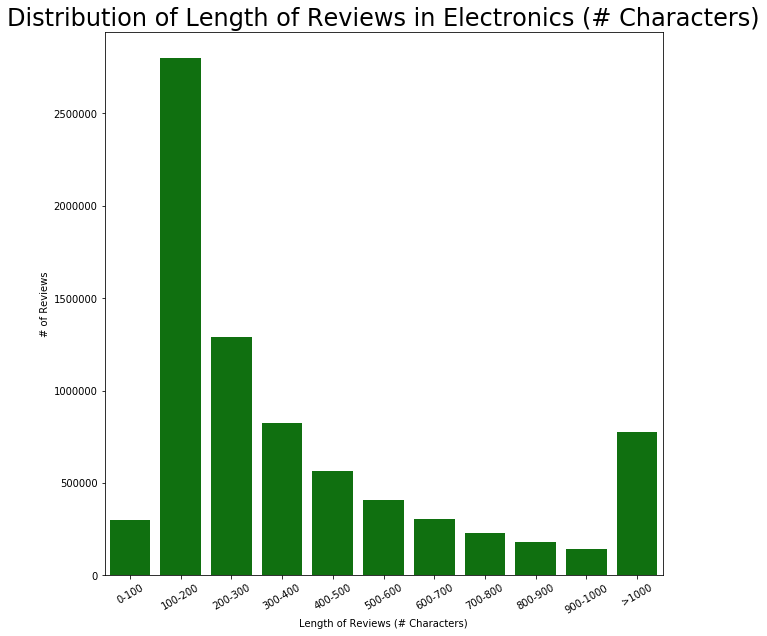

In [36]:
labels = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','>1000']

plt.figure(figsize=(10,10))
plt.title("Distribution of Length of Reviews in Electronics (# Characters)",fontsize=24)
sns.barplot(x = reviewLengthDistribution.bucket, y = reviewLengthDistribution.no_reviews,color='green')
plt.xlabel('Length of Reviews (# Characters)', fontsize=10)
plt.ylabel('# of Reviews', fontsize=10)
index = np.arange(len(reviewLengthDistribution.bucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [37]:
#Average Reviews Length in Electronics
sql = """
SELECT AVG(CHAR_LENGTH(reviewText)) AvgReviewLength
FROM `reviewdata.review_electronics`
"""
AvgReviewLength = client.query(sql).to_dataframe().AvgReviewLength[0]
AvgReviewLength

461.7942901340697

In [38]:
#Min , Max and Average Price of Products in Electronics
sql = """
SELECT MIN(price) MinPrice, MAX(price) MaxPrice, AVG(Price) AvgPrice
FROM `reviewdata.review_electronics`
WHERE price > 0
"""
priceInfo = client.query(sql).to_dataframe()
priceInfo

,MinPrice,MaxPrice,AvgPrice
0,0.01,999.99,73.005386


In [39]:
# Number of distinct Products with Price Information
sql = """
SELECT count(distinct asin) productwithPrice
FROM `reviewdata.review_electronics`
WHERE price > 0 AND reviewYear > 2010
"""
productwithPrice = client.query(sql).to_dataframe().productwithPrice[0]
productwithPrice

351651

In [40]:
#Distribution of Price Bucket in Electronics
sql = """
SELECT COUNT(distinct asin) no_products, bucket 
FROM (
    SELECT  asin, CASE WHEN price >=  0 AND price < 10 THEN 1
                        WHEN price >= 10 AND price < 20 THEN 2
                        WHEN price >= 20 AND price < 30 THEN 3
                        WHEN price >= 30 AND price < 50 THEN 4
                        WHEN price >= 50 AND price < 100 THEN 5
                        WHEN price >= 100 AND price < 150 THEN 6
                        WHEN price >= 150 AND price < 200 THEN 7
                        WHEN price >= 200 AND price < 300 THEN 8
                        WHEN price >= 300 THEN 9
                        END as bucket
    FROM `reviewdata.review_electronics`
    WHERE reviewYear > 2010) 
GROUP BY bucket
ORDER BY bucket
"""
priceDistribution = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d577f048>,
 <a list of 9 Text xticklabel objects>)

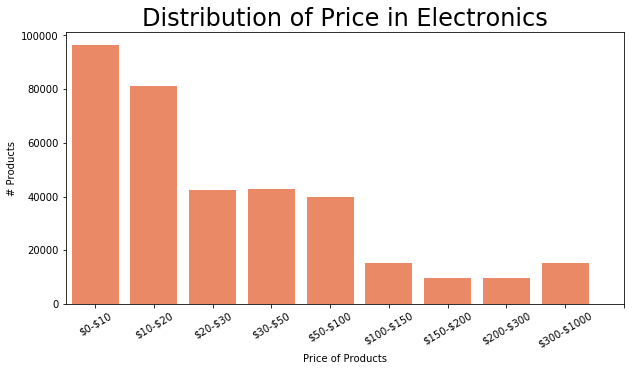

In [41]:
labels = ['\$0-\$10','\$10-\$20','\$20-\$30','\$30-\$50','\$50-\$100','\$100-\$150',
          '\$150-\$200','\$200-\$300','\$300-\$1000']

plt.figure(figsize=(10,5))
plt.title("Distribution of Price in Electronics",fontsize=24)
sns.barplot(x = priceDistribution.bucket, y = priceDistribution.no_products, color='coral')
plt.xlabel('Price of Products', fontsize=10)
plt.ylabel('# Products', fontsize=10)
index = np.arange(len(priceDistribution.bucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [42]:
#Percentage of Price Distribution
priceDistribution_d = priceDistribution[1:11]
priceDistribution_d["% Distribution"] = (priceDistribution_d.no_products/priceDistribution_d.no_products.sum())*100
priceDistribution_d

,no_products,bucket,% Distribution
1,96435,1.0,27.423497
2,81168,2.0,23.081976
3,42358,3.0,12.045466
4,42625,4.0,12.121393
5,39642,5.0,11.273109
6,15130,6.0,4.302561
7,9576,7.0,2.723154
8,9466,8.0,2.691873
9,15251,9.0,4.336970


In [44]:
# Number of distinct Products with Price Information
sql = """
SELECT count(distinct asin) productwithPrice100
FROM ( select asin , COUNT(reviewText)
FROM `reviewdata.review_electronics`
WHERE price > 0 AND reviewYear > 2010 
group by asin
having COUNT(reviewText) > 100
)
"""
productwithPrice100 = client.query(sql).to_dataframe().productwithPrice100[0]
productwithPrice100

10147

In [46]:
#Distribution of Price Bucket with Products having more than 100 reviews in Electronics
sql = """
SELECT COUNT(distinct asin) NoofProducts, bucket PriceBucket
FROM (
    SELECT  asin, CASE WHEN price >=  0 AND price < 10 THEN 1
                        WHEN price >= 10 AND price < 20 THEN 2
                        WHEN price >= 20 AND price < 30 THEN 3
                        WHEN price >= 30 AND price < 50 THEN 4
                        WHEN price >= 50 AND price < 100 THEN 5
                        WHEN price >= 100 AND price < 150 THEN 6
                        WHEN price >= 150 AND price < 200 THEN 7
                        WHEN price >= 200 AND price < 300 THEN 8
                        WHEN price >= 300 THEN 9
                        END as bucket
    FROM (  SELECT asin, price
            FROM `reviewdata.review_electronics`
            WHERE reviewYear > 2010 AND price > 0
            GROUP BY asin,price
            HAVING COUNT(reviewText) > 100)
    ) 
GROUP BY bucket
ORDER BY bucket
"""
priceDistribution100 = client.query(sql).to_dataframe()
priceDistribution100

,NoofProducts,PriceBucket
0,2399,1
1,1967,2
2,1102,3
3,1286,4
4,1387,5
5,572,6
6,445,7
7,412,8
8,577,9


In [47]:
#Relation of Price of product with the Average Rating of the product
sql = """
SELECT asin ProductID, price Price, bucket PriceBucket, count(reviewText) NumberReviews, 
       ROUND(AVG(overall),2) AvgRating, ROUND(AVG(CHAR_LENGTH(reviewText)),2) ReviewLength 
FROM (
    SELECT  asin,price, reviewText,overall, CASE WHEN price >=  0 AND price < 10 THEN 1
                        WHEN price >= 10 AND price < 20 THEN 2
                        WHEN price >= 20 AND price < 30 THEN 3
                        WHEN price >= 30 AND price < 50 THEN 4
                        WHEN price >= 50 AND price < 100 THEN 5
                        WHEN price >= 100 AND price < 150 THEN 6
                        WHEN price >= 150 AND price < 200 THEN 7
                        WHEN price >= 200 AND price < 300 THEN 8
                        WHEN price >= 300 THEN 9
                        END as bucket
    FROM `reviewdata.review_electronics`
    WHERE reviewYear > 2010 AND price > 0) 
GROUP BY asin,price,bucket
HAVING COUNT(reviewText)> 100
ORDER BY AVG(overall) desc,count(reviewText) desc,bucket
"""
ratingPriceDistribution = client.query(sql).to_dataframe()

Text(0, 0.5, 'Price of Product (\\$)')

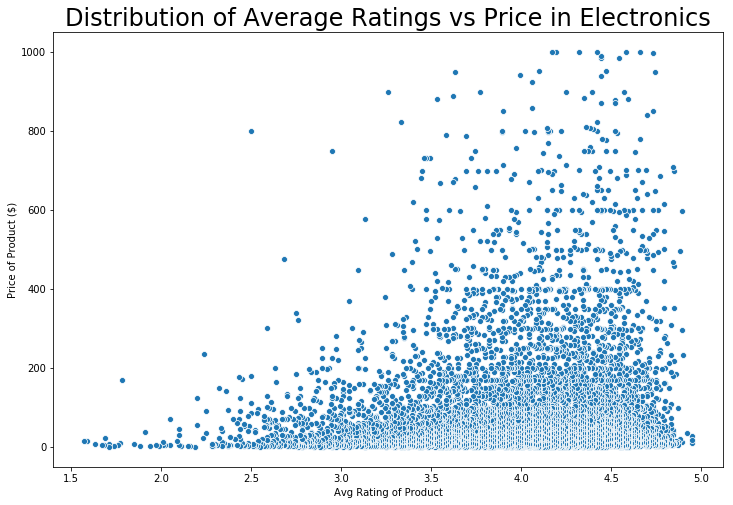

In [48]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Average Ratings vs Price in Electronics",fontsize=24)
sns.scatterplot(x=ratingPriceDistribution['AvgRating'], y=ratingPriceDistribution['Price'])
plt.xlabel('Avg Rating of Product', fontsize=10)
plt.ylabel('Price of Product (\$)', fontsize=10)

Text(0, 0.5, 'Review Length of Product')

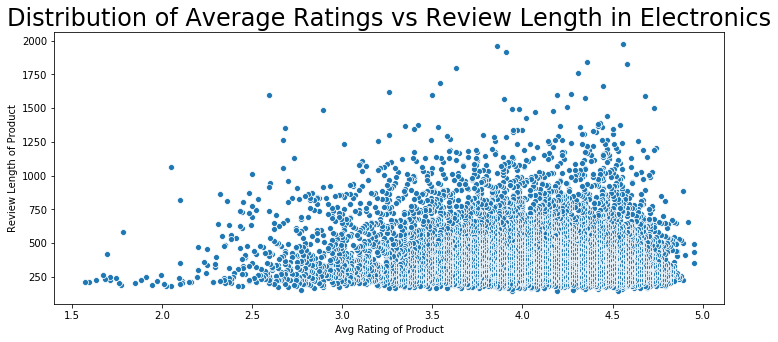

In [49]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Average Ratings vs Review Length in Electronics",fontsize=24)
sns.scatterplot(x=ratingPriceDistribution['AvgRating'], y=ratingPriceDistribution['ReviewLength'])
plt.xlabel('Avg Rating of Product', fontsize=10)
plt.ylabel('Review Length of Product', fontsize=10)

In [50]:
# Remove reviews with length greater than 3000 characters
ratingPriceDistributionProcessed = ratingPriceDistribution[ratingPriceDistribution <=3000]

Text(0.5, 0, 'Price of Product (\\$)')

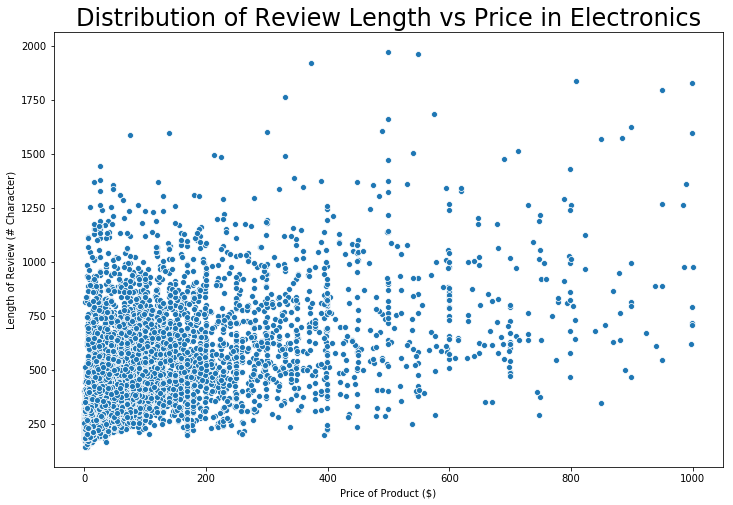

In [51]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Review Length vs Price in Electronics",fontsize=24)
sns.scatterplot(x=ratingPriceDistributionProcessed['Price'], y=ratingPriceDistributionProcessed['ReviewLength'])
plt.ylabel('Length of Review (# Character)', fontsize=10)
plt.xlabel('Price of Product (\$)', fontsize=10)

Text(0, 0.5, '# Reviews')

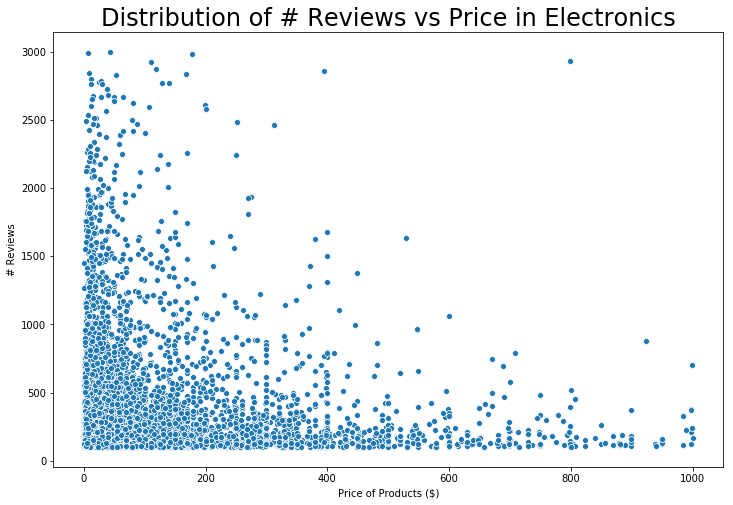

In [52]:
plt.figure(figsize=(12,8))
plt.title("Distribution of # Reviews vs Price in Electronics",fontsize=24)
sns.scatterplot(x=ratingPriceDistributionProcessed['Price'], y=ratingPriceDistributionProcessed['NumberReviews'])
plt.xlabel('Price of Products (\$)', fontsize=10)
plt.ylabel('# Reviews', fontsize=10)

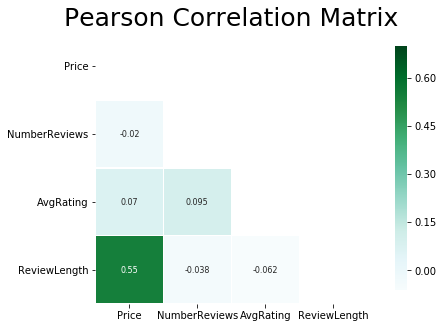

In [53]:
# Plot the Pearson Correlation Matrix for each of the variables

x_cols = [col for col in ratingPriceDistributionProcessed.columns if col not in ['ProductID','PriceBucket']]
mask = np.zeros_like(ratingPriceDistributionProcessed[x_cols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 5))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(ratingPriceDistributionProcessed[x_cols].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [54]:
#Split of Price Buckets with its associated metrics
sql = """
SELECT bucket PriceBucket, COUNT(distinct asin) ProductID, count(reviewText) NumberReviews, 
       ROUND(AVG(overall),2) AvgRating, ROUND(AVG(CHAR_LENGTH(reviewText)),2) ReviewLength 
FROM (
    SELECT  asin,price, reviewText,overall, CASE WHEN price >=  0 AND price < 10 THEN 1
                        WHEN price >= 10 AND price < 20 THEN 2
                        WHEN price >= 20 AND price < 30 THEN 3
                        WHEN price >= 30 AND price < 50 THEN 4
                        WHEN price >= 50 AND price < 100 THEN 5
                        WHEN price >= 100 AND price < 150 THEN 6
                        WHEN price >= 150 AND price < 200 THEN 7
                        WHEN price >= 200 AND price < 300 THEN 8
                        WHEN price >= 300 THEN 9
                        END as bucket
    FROM `reviewdata.review_electronics`
    WHERE reviewYear > 2010) 
GROUP BY bucket
ORDER BY bucket,AVG(overall) desc,count(reviewText) desc
"""
ratingPriceDistribution1 = client.query(sql).to_dataframe()

In [55]:
ratingPriceDistribution1['AvgReviews'] = round(ratingPriceDistribution1['NumberReviews']
                                               /ratingPriceDistribution1['ProductID'],0)

In [56]:
ratingPriceDistribution1[1:10]

,PriceBucket,ProductID,NumberReviews,AvgRating,ReviewLength,AvgReviews
1,1.0,96435,1527459,4.00,284.78,16.0
2,2.0,81168,1228586,4.06,329.96,15.0
3,3.0,42358,695442,4.07,386.37,16.0
4,4.0,42625,790236,4.03,429.35,19.0
5,5.0,39642,788194,4.00,494.20,20.0
6,6.0,15130,347465,4.00,559.39,23.0
7,7.0,9576,256727,4.11,550.29,27.0
8,8.0,9466,226036,4.10,619.97,24.0
9,9.0,15251,297333,4.11,718.08,19.0


In [57]:
#Number of distinct Products in Electronics
sql = """
SELECT COUNT(distinct asin) no_products 
FROM `reviewdata.review_electronics`
"""
client.query(sql).to_dataframe().no_products[0]

475976

In [59]:
#Distribution of Ratings of Products in Electronics
sql = """
SELECT COUNT(distinct asin) NoofProducts, bucket RatingBucket
FROM (
    SELECT  asin, CASE WHEN avg(overall) >=  0 AND avg(overall) < 1 THEN 1
                        WHEN avg(overall) >= 1 AND avg(overall) < 2 THEN 2
                        WHEN avg(overall) >= 2 AND avg(overall) < 3 THEN 3
                        WHEN avg(overall) >= 3 AND avg(overall) < 4 THEN 4
                        WHEN avg(overall) >= 4 AND avg(overall) < 5 THEN 5
                        WHEN avg(overall) = 5 THEN 6
                        END as bucket
    FROM `reviewdata.review_electronics`
    group by asin) 
GROUP BY bucket
ORDER BY bucket
"""
productRatingDistribution = client.query(sql).to_dataframe()
productRatingDistribution

,NoofProducts,RatingBucket
0,33508,2
1,40832,3
2,110032,4
3,160237,5
4,131367,6


([<matplotlib.axis.XTick at 0x1b8d823b828>,
 <a list of 5 Text xticklabel objects>)

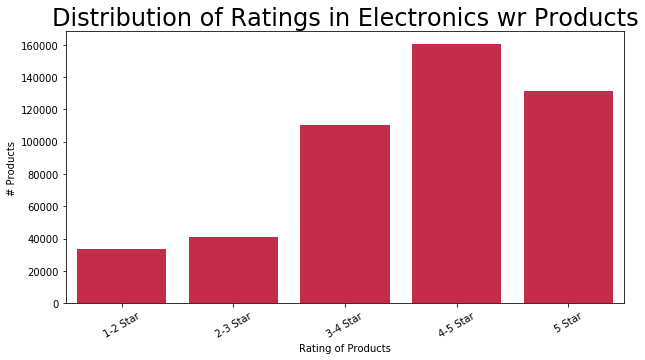

In [62]:
labels = ['1-2 Star','2-3 Star','3-4 Star','4-5 Star','5 Star']

plt.figure(figsize=(10,5))
plt.title("Distribution of Ratings in Electronics wr Products",fontsize=24)
sns.barplot(x = productRatingDistribution.RatingBucket, y = productRatingDistribution.NoofProducts,color='crimson')
plt.xlabel('Rating of Products', fontsize=10)
plt.ylabel('# Products', fontsize=10)
index = np.arange(len(productRatingDistribution.RatingBucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [63]:
# Analysis of Reviewers Behavior
sql = """
select reviewerID, count(reviewText) NumberReviews, 
       ROUND(AVG(overall),2) AvgRating, ROUND(AVG(CHAR_LENGTH(reviewText)),2) ReviewLength
from `reviewdata.review_electronics`
group by reviewerID
order by count(reviewText) desc
"""
reviewerDistribution = client.query(sql).to_dataframe()

In [64]:
# Number of Reviewers in Electronics
len(reviewerDistribution.reviewerID.unique())

4200844

In [65]:
reviewerDistribution.head(10)

,reviewerID,NumberReviews,AvgRating,ReviewLength
0,A5JLAU2ARJ0BO,520,3.86,1453.87
1,ADLVFFE4VBT8,501,4.28,2656.50
2,A3OXHLG6DIBRW8,498,4.45,968.56
3,A6FIAB28IS79,431,4.18,2274.83
4,A680RUE1FDO8B,406,4.41,1781.24
5,A1ODOGXEYECQQ8,380,4.31,1116.33
6,A36K2N527TXXJN,314,4.53,2097.19
7,A2AY4YUOX2N1BQ,311,4.56,1854.41
8,AWPODHOB4GFWL,308,4.39,1377.35
9,A25C2M3QF9G7OQ,296,4.63,1731.98


In [66]:
# Remove records with reviews > 50
reviewDistDum = reviewerDistribution[reviewerDistribution['NumberReviews'] < 50]

Text(0, 0.5, '# Reviewers')

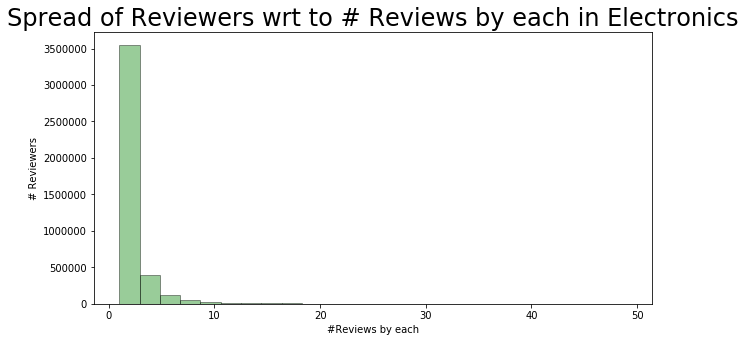

In [67]:
plt.figure(figsize=(10,5))
plt.title("Spread of Reviewers wrt to # Reviews by each in Electronics",fontsize=24)
sns.distplot(reviewDistDum['NumberReviews'], hist=True, kde=False, 
             bins=int(25), color = 'green',
             hist_kws={'edgecolor':'black'})
plt.xlabel('#Reviews by each', fontsize=10)
plt.ylabel('# Reviewers', fontsize=10)

Text(0, 0.5, '# Reviewers')

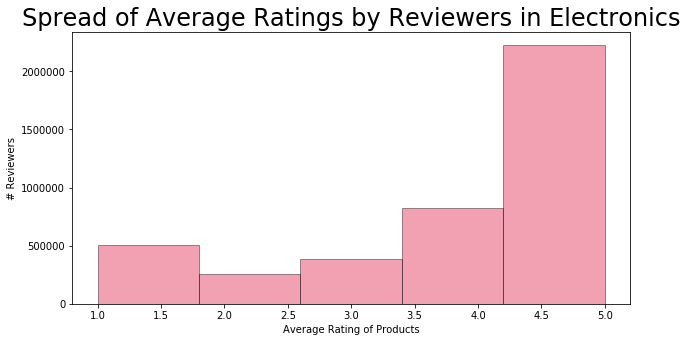

In [68]:
plt.figure(figsize=(10,5))
plt.title("Spread of Average Ratings by Reviewers in Electronics",fontsize=24)
sns.distplot(reviewerDistribution['AvgRating'], hist=True, kde=False, 
             bins=int(5), color = 'crimson',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average Rating of Products', fontsize=10)
plt.ylabel('# Reviewers', fontsize=10)

In [69]:
#Remove reviewers with Reviews < 5
ratingAnalysis = reviewerDistribution[reviewerDistribution.NumberReviews > 5]

Text(0, 0.5, '# Reviewers')

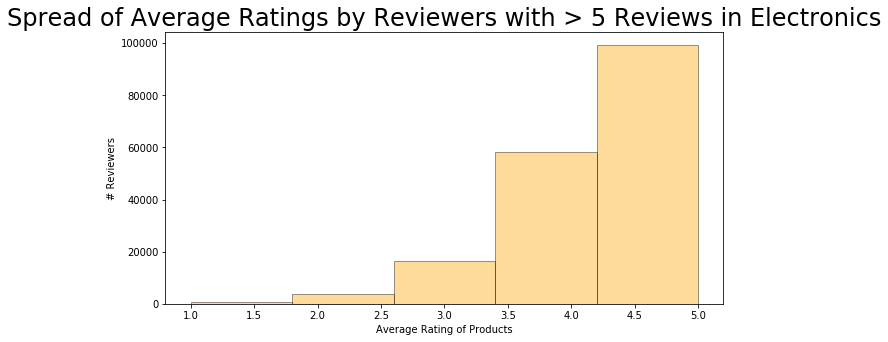

In [70]:
plt.figure(figsize=(10,5))
plt.title("Spread of Average Ratings by Reviewers with > 5 Reviews in Electronics",fontsize=24)
sns.distplot(ratingAnalysis['AvgRating'], hist=True, kde=False, 
             bins=int(5), color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average Rating of Products', fontsize=10)
plt.ylabel('# Reviewers', fontsize=10)

In [72]:
# number of Reviewers who wrote more than 5 Reviews
len(ratingAnalysis.reviewerID.unique())/len(reviewerDistribution.reviewerID.unique())*100

4.252788249218491

In [73]:
# Number of Reviewers on an average per Product
sql = """
SELECT ROUND(AVG(NoofReviewers),0) AverageNoofReviewers
from (
select asin ProductID, COUNT(reviewerID) NoofReviewers
from `reviewdata.review_electronics`
group by asin
)
"""
AverageNoofReviewers = client.query(sql).to_dataframe().AverageNoofReviewers[0]
AverageNoofReviewers

16.0

In [92]:
# Top 10 Reviewers with their Split of Rating
sql = """
select reviewerID Customer , 
count(*) NoofReviews, 
Round(avg(overall),2) AvgRating, 
AVG(CHAR_LENGTH(reviewText)) AvgReviewLength,
sum(case when overall = 1 then 1 else 0 end) OneStar, 
sum(case when overall = 2 then 1 else 0 end) TwoStar, 
sum(case when overall = 3 then 1 else 0 end) ThreeStar, 
sum(case when overall = 4 then 1 else 0 end) FourStar, 
sum(case when overall = 5 then 1 else 0 end) FiveStar 
from `reviewdata.review_electronics`  
group by 1 
order by 2 desc 
limit 10
"""
TopReviewersSplit = client.query(sql).to_dataframe()
TopReviewersSplit

,Customer,NoofReviews,AvgRating,AvgReviewLength,OneStar,TwoStar,ThreeStar,FourStar,FiveStar
0,A5JLAU2ARJ0BO,520,3.86,1453.865385,67,51,44,83,275
1,ADLVFFE4VBT8,501,4.28,2656.502994,9,24,54,143,271
2,A3OXHLG6DIBRW8,498,4.45,968.558233,2,7,25,194,270
3,A6FIAB28IS79,431,4.18,2274.825986,7,28,56,128,212
4,A680RUE1FDO8B,406,4.41,1781.236453,21,15,38,36,296
5,A1ODOGXEYECQQ8,380,4.31,1116.334211,0,10,24,186,160
6,A36K2N527TXXJN,314,4.53,2097.187898,1,2,11,117,183
7,A2AY4YUOX2N1BQ,311,4.56,1854.408360,1,2,18,91,199
8,AWPODHOB4GFWL,308,4.39,1377.353896,7,7,29,80,185
9,ARBKYIVNYWK3C,296,4.44,981.111486,2,3,29,92,170


In [93]:
# Top 25 Reviewers with their Split of Brand
sql = """
select reviewerID Customer, brand Brand, count(Brand) NoofReviews
FROM `reviewdata.review_electronics`
WHERE reviewerID in (
  select reviewerID Customer 
  from `reviewdata.review_electronics`  
  group by 1
  order by COUNT(reviewText) desc 
limit 25)
group by reviewerID, brand
order by reviewerID,count(Brand) DESC
"""
TopReviewersBrandSplit = client.query(sql).to_dataframe()
TopReviewersBrandSplit.head()

,Customer,Brand,NoofReviews
0,A12DQZKRKTNF5E,ARCTIC,7
1,A12DQZKRKTNF5E,Logitech,7
2,A12DQZKRKTNF5E,HP,6
3,A12DQZKRKTNF5E,Sony,5
4,A12DQZKRKTNF5E,Sabrent,4


In [94]:
# Top 10 Reviewers with their top 2 favourite brands
sql = """
SELECT
  Customer,
  Brand,
  NoofReviews
FROM (select reviewerID Customer, 
             brand Brand, 
             count(Brand) NoofReviews,
             RANK() OVER (PARTITION BY reviewerID ORDER BY COUNT(Brand) DESC) AS BrandRank
FROM `reviewdata.review_electronics`
WHERE reviewerID in (
  select reviewerID Customer 
  from `reviewdata.review_electronics`  
  group by 1
  order by COUNT(reviewText) desc 
limit 25)
group by reviewerID, brand
order by reviewerID, BrandRank ASC)
WHERE
  BrandRank <= 2
ORDER BY
  Customer ,
  NoofReviews DESC
"""
TopReviewersTopBrandSplit = client.query(sql).to_dataframe()
TopReviewersTopBrandSplit.head(10)

,Customer,Brand,NoofReviews
0,A12DQZKRKTNF5E,ARCTIC,7
1,A12DQZKRKTNF5E,Logitech,7
2,A17BUUBOU0598B,BELKIN,11
3,A17BUUBOU0598B,Logitech,10
4,A1ODOGXEYECQQ8,BELKIN,8
5,A1ODOGXEYECQQ8,Canon,6
6,A1ODOGXEYECQQ8,Western Digital,6
7,A1ODOGXEYECQQ8,Sabrent,6
8,A1UQBFCERIP7VJ,BELKIN,12
9,A1UQBFCERIP7VJ,Sabrent,7


In [95]:
# Brand level aggregation of Reviewers
TopReviewersBrandSplit.groupby(
   ['Brand']
).agg(
    {
         'NoofReviews':sum,
         'Customer': "count"
    }
).sort_values(by = ['NoofReviews'], ascending = False).head(10)

,NoofReviews,Customer
Brand,,
Logitech,136,23
BELKIN,135,24
Sony,75,19
Canon,75,18
SanDisk,66,22
Sabrent,64,19
Seagate,62,19
Apple,57,16
Case Logic,54,19


In [74]:
# Brand Overview
sql = """
select count(distinct brand) Brand
from `reviewdata.review_electronics`
where Brand is NOT NULL and Brand <> 'Unknown' and Brand <> ''
"""
BrandInfo = client.query(sql).to_dataframe().Brand[0]
BrandInfo

9905

In [75]:
# Brands with number of products
sql = """
SELECT COUNT(distinct brand) NoofBrands, bucket 
FROM (
    SELECT  brand, CASE WHEN COUNT(distinct asin) >=  0 AND COUNT(distinct asin) < 10 THEN 1
                        WHEN COUNT(distinct asin) >= 10 AND COUNT(distinct asin) < 50 THEN 2
                        WHEN COUNT(distinct asin) >= 50 AND COUNT(distinct asin) < 100 THEN 3
                        WHEN COUNT(distinct asin) >= 100 AND COUNT(distinct asin) < 500 THEN 4
                        WHEN COUNT(distinct asin) >= 500 THEN 5
                        END as bucket
    FROM `reviewdata.review_electronics`
    group by brand) 
GROUP BY bucket
ORDER BY bucket
"""
BrandBucketRelation = client.query(sql).to_dataframe()

([<matplotlib.axis.XTick at 0x1b8d794fe10>,
 <a list of 5 Text xticklabel objects>)

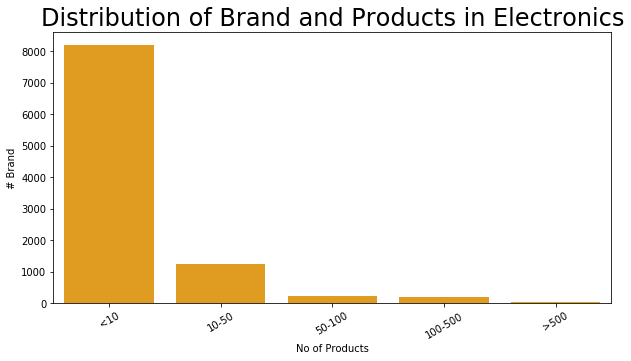

In [76]:
labels = ['<10','10-50','50-100','100-500','>500']

plt.figure(figsize=(10,5))
plt.title("Distribution of Brand and Products in Electronics",fontsize=24)
sns.barplot(x = BrandBucketRelation.bucket, y = BrandBucketRelation.NoofBrands,color='orange')
plt.xlabel('No of Products', fontsize=10)
plt.ylabel('# Brand', fontsize=10)
index = np.arange(len(BrandBucketRelation.bucket))
plt.xticks(index, labels, fontsize=10, rotation=30)

In [81]:
# Top 25 High Rated Brands with more than 100 products
sql = """
select brand Brand, COUNT(distinct asin) NoofProducts, COUNT(ReviewText) NoofReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
where Brand is NOT NULL and Brand <> 'Unknown' and Brand <> ''
group by brand
having COUNT(distinct asin) > 100 AND AVG(overall) > 4
order by  COUNT(ReviewText) Desc,AVG(overall) DESC
LIMIT 25
"""
BrandHighRatingRelation100 = client.query(sql).to_dataframe()


In [82]:
BrandHighRatingRelation100

,Brand,NoofProducts,NoofReviews,AvgRating
0,Logitech,493,114553,4.18
1,Sony,2032,96104,4.09
2,SanDisk,616,79315,4.31
3,Canon,692,71328,4.39
4,Samsung,1068,61060,4.14
5,Garmin,531,54220,4.07
6,Apple,344,53165,4.24
7,Asus,704,46864,4.04
8,Panasonic,741,44689,4.21
9,Nikon,638,43265,4.33


In [83]:
# Top 25 High Rated Brands with more than 500 products
sql = """
select brand Brand, COUNT(distinct asin) NoofProducts, COUNT(ReviewText) NoofReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
where Brand is NOT NULL and Brand <> 'Unknown' and Brand <> ''
group by brand
having COUNT(distinct asin) > 500 AND AVG(overall) > 4
order by  COUNT(ReviewText) Desc,AVG(overall) DESC
LIMIT 25
"""
BrandHighRatingRelation500 = client.query(sql).to_dataframe()

In [84]:
BrandHighRatingRelation = BrandHighRatingRelation500.head(10)

In [85]:
BrandHighRatingRelation

,Brand,NoofProducts,NoofReviews,AvgRating
0,Sony,2032,96104,4.09
1,SanDisk,616,79315,4.31
2,Canon,692,71328,4.39
3,Samsung,1068,61060,4.14
4,Garmin,531,54220,4.07
5,Asus,704,46864,4.04
6,Panasonic,741,44689,4.21
7,Nikon,638,43265,4.33
8,HP,2112,27728,4.01
9,StarTech,1161,20367,4.14


([<matplotlib.axis.XTick at 0x1b8de33b3c8>,
 <a list of 10 Text xticklabel objects>)

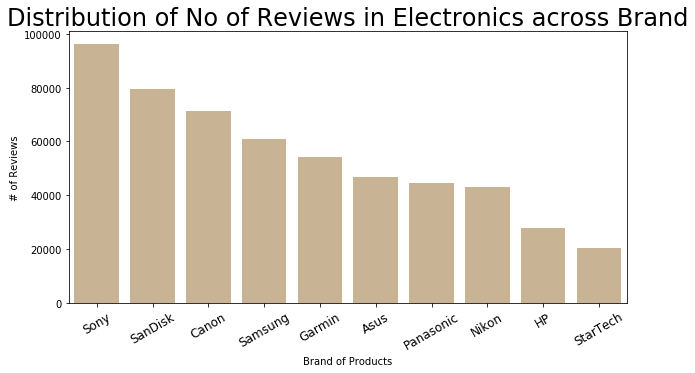

In [86]:
plt.figure(figsize=(10,5))
plt.title("Distribution of No of Reviews in Electronics across Brand",fontsize=24)
sns.barplot(x = BrandHighRatingRelation.Brand, y = BrandHighRatingRelation.NoofReviews,color='tan')
plt.xlabel('Brand of Products', fontsize=10)
plt.ylabel('# of Reviews', fontsize=10)
index = np.arange(len(BrandHighRatingRelation.Brand))
plt.xticks(index, BrandHighRatingRelation.Brand, fontsize=12, rotation=30)

([<matplotlib.axis.XTick at 0x1b8e81e6518>,
 <a list of 10 Text xticklabel objects>)

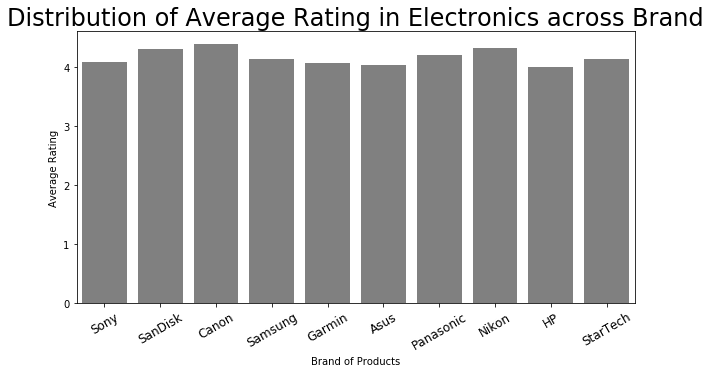

In [87]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Average Rating in Electronics across Brand",fontsize=24)
sns.barplot(x = BrandHighRatingRelation.Brand, y = BrandHighRatingRelation.AvgRating,color='grey')
plt.xlabel('Brand of Products', fontsize=10)
plt.ylabel('Average Rating', fontsize=10)
index = np.arange(len(BrandHighRatingRelation.Brand))
plt.xticks(index, BrandHighRatingRelation.Brand, fontsize=12, rotation=30)

In [90]:
# Top 10 Low Rated Brands with more than 100 products
sql = """
select brand Brand, COUNT(distinct asin) NoofProducts, COUNT(ReviewText) NoofReviews, ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
where Brand is NOT NULL and Brand <> 'Unknown' and Brand <> ''
group by brand
having COUNT(distinct asin) > 100 AND AVG(overall) < 2.5
order by  COUNT(ReviewText) Desc,AVG(overall) DESC
LIMIT 10
"""
BrandLowRatingRelation = client.query(sql).to_dataframe()
BrandLowRatingRelation

,Brand,NoofProducts,NoofReviews,AvgRating


In [91]:
# Top 10 Low Rated Brands
sql = """
select brand Brand, COUNT(distinct asin) NoofProducts, COUNT(ReviewText) NoofReviews,ROUND(AVG(overall),2) AvgRating
from `reviewdata.review_electronics`
where Brand is NOT NULL and Brand <> 'Unknown' and Brand <> ''
group by brand
having AVG(overall) < 2
order by COUNT(distinct asin) desc, AVG(overall) ASC
LIMIT 10
"""
BrandLowRatingRelation = client.query(sql).to_dataframe()
BrandLowRatingRelation

,Brand,NoofProducts,NoofReviews,AvgRating
0,Mini Gadgets,14,40,1.95
1,Nextar,7,28,1.93
2,Hypercel,5,7,1.57
3,As Seen On TV,4,140,1.87
4,MGA,4,18,1.94
5,LensSkins,3,3,1.33
6,Hog Wild,3,5,1.60
7,Digital King,3,5,1.80
8,Paraben,3,20,1.95
9,T-Tech by Tumi,2,2,1.00


In [78]:
# Reviews from 2014
sql = """
select asin,ReviewText
from `reviewdata.review_electronics`  
where reviewYear = 2014
"""
reviewData = client.query(sql).to_dataframe()

In [87]:
#Sentiment Analysis on Reviews
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
from textblob import TextBlob
from stop_words import get_stop_words

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [44]:
def f_tags(review_df):
    if review_df['sentiment'] > 0:
        val = "Positive"
    elif review_df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [88]:
#Process the Positive and Negative Reviews and Present the Frequency of words
def processWordCloud(review_df):
    text_lower = review_df['ReviewText'].str.lower().str.cat(sep=' ')
    # removes punctuation,numbers and returns list of words
    text_remove_pun = re.sub('[^A-Za-z]+', ' ', text_lower)
    #remove all the stopwords from the text
    stop_words = list(get_stop_words('en'))  
    nltk_words = list(stopwords.words('english'))
    nltk_words.extend(stop_words)
    
    word_tokens_tags = word_tokenize(text_remove_pun)
    filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in nltk_words]
    filtered_sentence_tags = []
    for w_tags in word_tokens_tags:
        if w_tags not in nltk_words:
            filtered_sentence_tags.append(w_tags)

    # Remove characters which have length less than 2  
    without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

    # Remove numbers
    cleaned_data = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()] 
    
    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data)
    rslt = pd.DataFrame(word_dist.most_common(100),
                        columns=['Word', 'Frequency'])

    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Word", y="Frequency", data=rslt.head(7))
    
    wc(cleaned_data,'black','Frequent Words' )

In [79]:
# Calculate the Review Sentiment
reviewPolarity = []
for review in reviewData.ReviewText:
    blob = TextBlob(review)
    complete_sentiment = blob.sentiment.polarity
    sentence_polarity = []
    for sentence in blob.sentences:
        sentence_polarity.append(sentence.sentiment.polarity)
    reviewPolarity.append(round(sum(sentence_polarity),3))
reviewData['sentiment'] = reviewPolarity

In [80]:
#Tag the Review Sentiment Type
reviewData['Sentiment_Type'] = reviewData.apply(f_tags, axis=1)

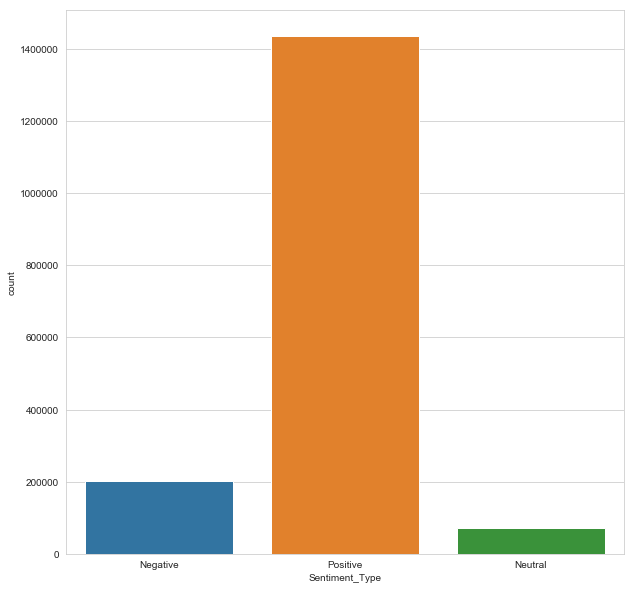

In [82]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=reviewData)

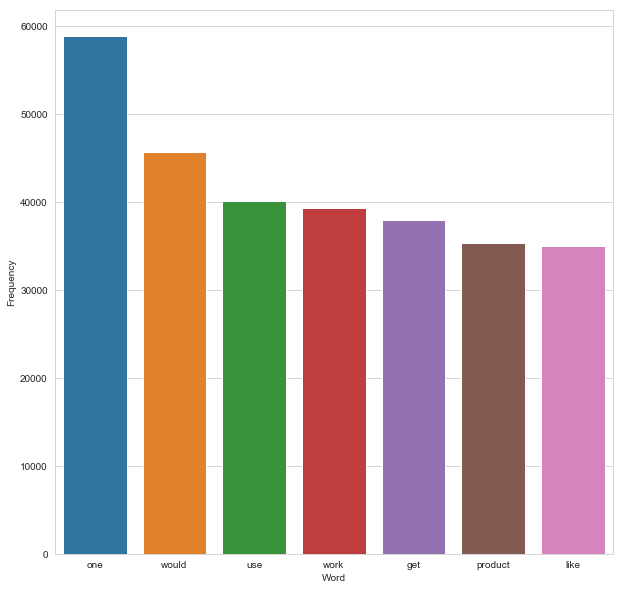

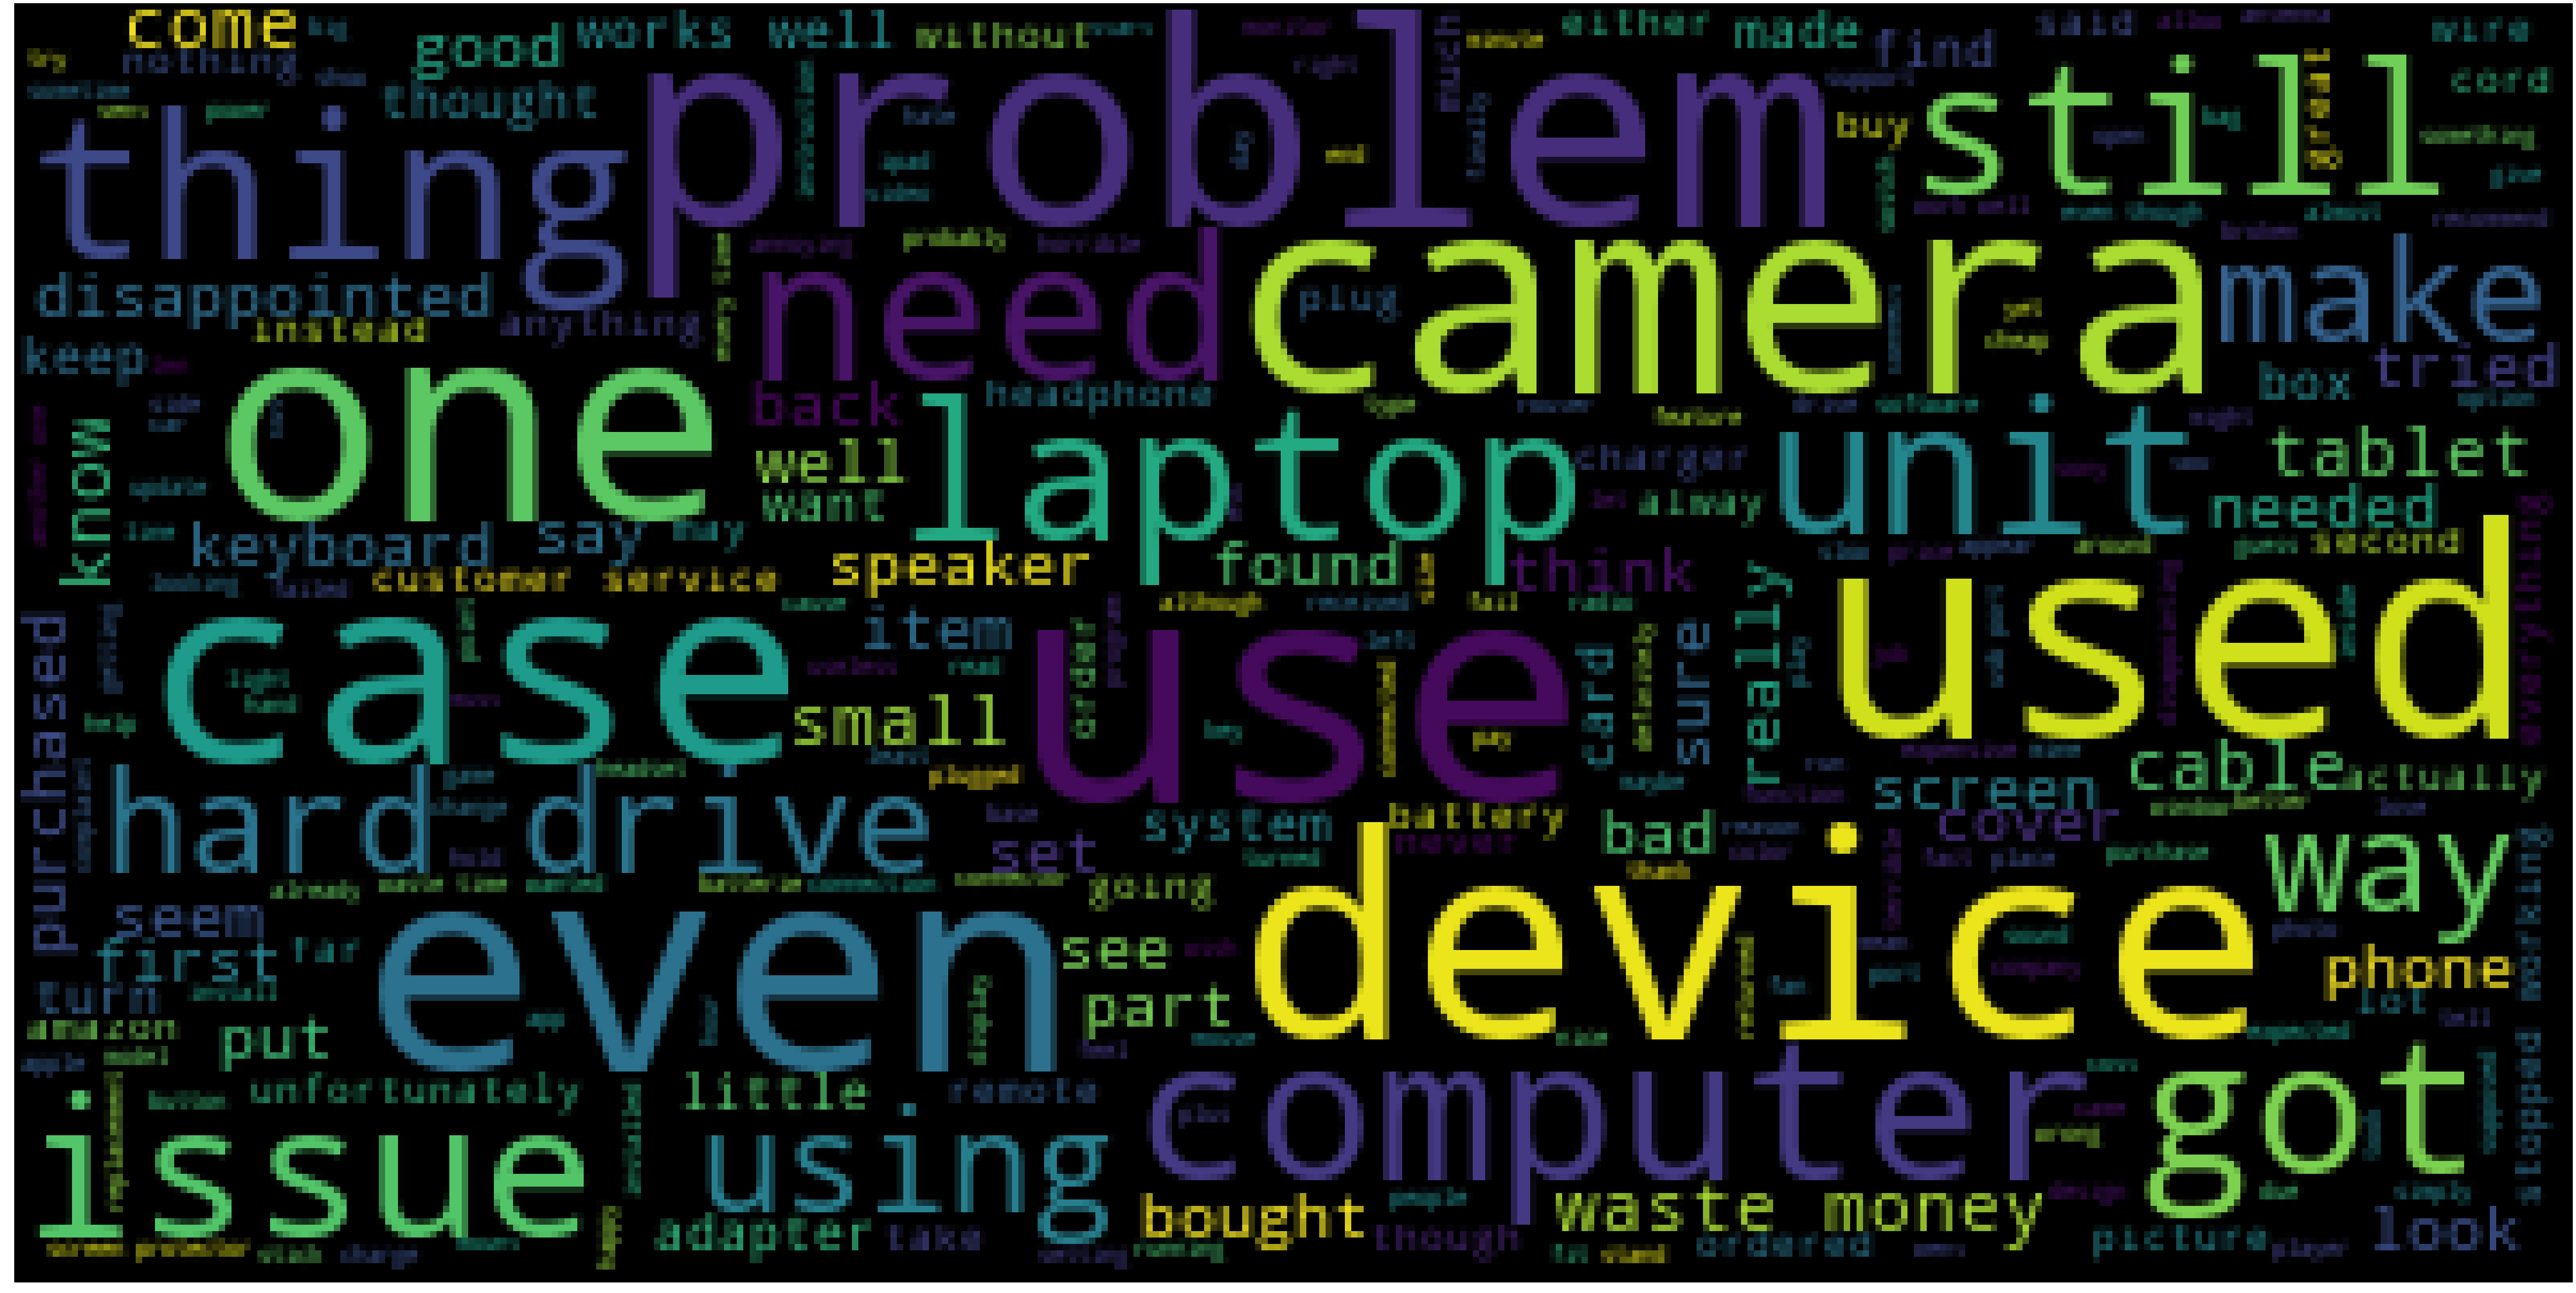

In [83]:
#Process Word Cloud and Frequency for Positive Sentiments
processWordCloud(reviewData[reviewData.Sentiment_Type == 'Negative'])